# Вариант 9
Цель данного упражнения – экспериментально выяснить зависимость числа обусловленности $1$ от порядка случайной матрицы. Пусть $A_n$ – матрица порядка $n$ со случайными элементами, распределенными по нормальному закону с мат ожиданием $0$ и средним квадратическим отклонением $1$. Экспериментальным путем необходимо выяснить, что в среднем $_1A_n$ растет как показательная функция от $n$, а именно, что для большинства матриц.
$$
c_1n^p \le _1A_n \le c_2n^p
$$
Экспериментально необходимо подобрать $p, c_1, c_2$ Для этого испытайте серию случайных матриц $A_n$ разных порядков (например, $1 \le n \le 100$). Для каждой сгенерированной матрицы на графике изобразите точкой зависимость числа обусловленности $_1A_n$ от порядка $n$. Используйте двойную логарифмическую шкалу. В этой шкале показательные функции изображаются прямыми линиями. Подберите $p, c_1, c_2$ и в тех же осях нарисуйте графики функций $c_1n^p, c_2n^p$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal, optimize

# Генерация матриц
Сгенерируем 100 случайных матриц с порядком от 1 до 100. В качестве функции для генерации случайных матриц будем использовать функцию numpy.random.normal($\mu$, $\sigma$), где $\mu$ - мат ожидание, равное $0$, а $\sigma$ - среднее квадратическое отклонение, равное $1$.

In [2]:
n = 100
matrixs = []
np.random.seed(42)
for i in range(1, n+1):
    matrixs.append(np.random.normal(0,1, size=(i,i)))

Создадим numpy массив матхеттенских чисел обусловленности, используя функцию numpy.linalg.cond данных массив будем использовать в качестве значений по оси $OY$. Для генерации последовательности от $1$ до $100$, используемуе в качестве значений по оси $OX$, будем использовать функцию numpy.linspace.

Отобразим на логарифмическом графике полученные числа обусловленности.

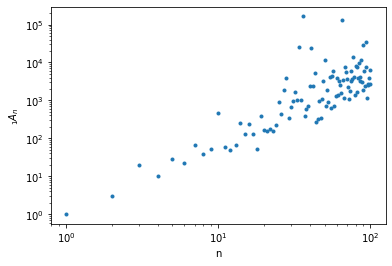

In [3]:
conds = np.array(list(map(lambda A: np.linalg.cond(A,1), matrixs)))
sizes = np.linspace(1, n, n)

plt.loglog(sizes, conds, '.')
plt.xlabel('n')
plt.ylabel('$_1A_n$')
pass

# Поиск констант
Объявим функции $cn^p$, где в 1 аргемент $p$ является параметром функции, а во 2 используется глобальное значение. Параметр $c$ используется в обоих функциях.

In [4]:
p = 0
def func(n, c, p):
    return c* (n**p)
def funcP(n,c):
    return c*(n**p)

Поиск будем осуществлять, используя минимумы и максимумы чисел обусловленности. Для поиска минимумов и максимумов будем использовать функции signal.argrelmin и signal.argrelmax соответственно.

In [5]:
maxs = signal.argrelmax(conds, order=10)[0]
maxsY = conds[maxs]

mins = signal.argrelmin(conds, order=10)[0]
minsY = conds[mins]

Первым делом найдем $c_1 и p$ используя функцию scipy.optimize.curve_fit, где в качестве аргументов укажем функцию func и координаты точек минимума. Запомним полученный $p$. Повторим операцию, для нахождения $c_2$, в качестве аргумента для функции scipy.optimize.curve_fit укажем функцию funcP (где используется найденный $p$) и координаты точек максимума.

In [6]:
poptMin, _ = optimize.curve_fit(func, mins, minsY)

p = poptMin[1]

poptMax, _ = optimize.curve_fit(funcP, maxs, maxsY)

c1, c2 = poptMin[0], poptMax[0]

Добавим на наш граффик функции $c_1n^p$ и $c_2n^p$

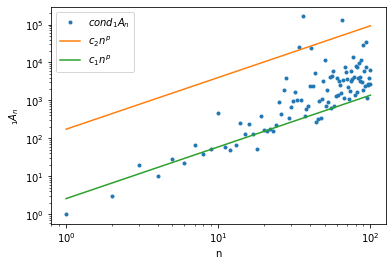

In [7]:
plt.loglog(sizes, conds, '.', label='$cond_1 A_n$')
plt.loglog(sizes, funcP(sizes, *poptMax), label='$c_2n^p$')
plt.loglog(sizes, func(sizes, *poptMin), label='$c_1n^p$')
plt.xlabel('n')
plt.ylabel('$_1A_n$')
plt.legend()
pass

# Проверка
Проверим, сколько раз выполняется условие $c_1n^p \le _1A_n \le c_2n^p$ $(1)$

In [8]:
check = 0
for i in range(1, n+1):
    if func(i, c1, p) <= conds[i-1] <= func(i, c2, p):
        check += 1
check

82

Условие $(1)$ выполняется $82$ раза из $100$. Значит искомые $c_1, c_2, p$ Найдены. Выведем их значение.

In [9]:
print('c1 = %lf c2 = %lf p = %lf' % (c1, c2, p))

c1 = 2.562851 c2 = 173.387974 p = 1.364190
